# **PROJECT AI**

1. NORIZLIN BINTI MOHD DENEIAL (52213124678)
2. NUR AYUNIE BINTI MOHD AZMI (52213124846)
3. NUR AINA ATHILLAH BINTI NOR AZLAN (52215120796)


TITLE


"Subspecies of Wolves"
Images of Gray Wolves, Arctic Wolves, Red Wolves, Ethiopian Wolves, etc., highlighting their unique physical characteristics and coat variations.

1. Data Engineer - Data preparation

-	Collecting data
-	Standardize data
-	Creating dataset

# Introduction

This project focuses on creating a deep learning pipeline to classify wolf subspecies based on their images. The goal is to build a robust convolutional neural network (CNN) model capable of distinguishing between multiple wolf subspecies using a dataset of labeled images. It involves Data Preprocessing, CNN Architecture Design, Model Training, Hyperparameter Tuning, Evaluation and Results and Visualization. This project demonstrates a comprehensive approach to image classification with deep learning, emphasizing both technical rigor and practical application in wildlife species identification.

Found 8664 images belonging to 10 classes.
Found 2161 images belonging to 10 classes.


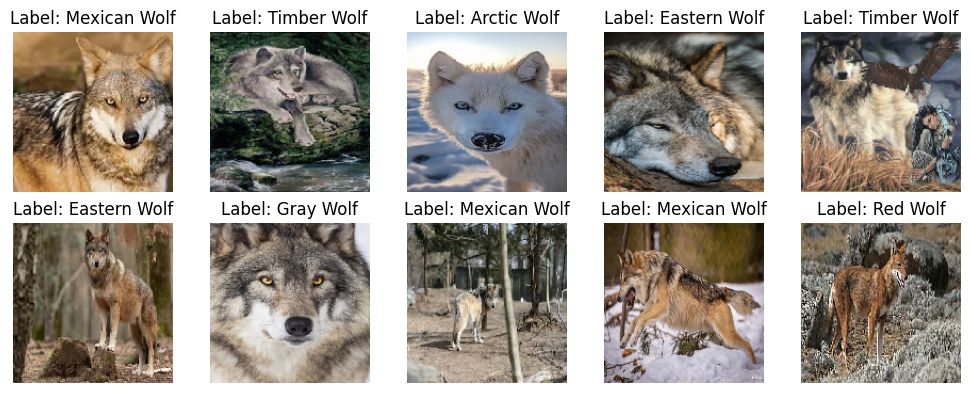

In [114]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Path to your dataset directory
dataset_dir = r'images'  # Change this path to your image dataset

# ImageDataGenerator for loading and preprocessing images
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize image pixels to a range of 0 to 1 (from 0 to 255)
    validation_split=0.2   # Split 20% of the data for validation, 80% for training
)

# Load training data from the directory
train_data = train_datagen.flow_from_directory(
    dataset_dir,            # Path to the dataset directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=20,          # Batch size, how many images to process at once
    class_mode='categorical', # 'categorical' for multi-class classification
    subset='training',      # Use the training subset (80% of the data)
    shuffle=True            # Shuffle data to improve training generalization
)

# Load validation data from the directory
val_data = train_datagen.flow_from_directory(
    dataset_dir,            # Path to the dataset directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=20,          # Batch size, how many images to process at once
    class_mode='categorical', # 'categorical' for multi-class classification
    subset='validation'     # Use the validation subset (20% of the data)
)

# Display some images with their subspecies names
images, labels = next(train_data)  # Get a batch of images and their corresponding labels

# Set up a grid of 2 rows and 5 columns for displaying images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # Create a 2x5 grid of subplots

# Get the class names (subspecies) from the class_indices dictionary
class_labels = train_data.class_indices  # Dictionary mapping class names to indices
class_names = list(class_labels.keys())  # List of class names (subspecies)

# Loop over each subplot (ax) and display the image
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])  # Display the image in the subplot
    label_index = labels[i].argmax()  # Get the index of the class with the highest probability (one-hot encoding)
    ax.set_title(f"Label: {class_names[label_index]}")  # Set the title to the class name (subspecies)
    ax.axis('off')  # Hide axes for a cleaner display

# Adjust layout to avoid overlapping and show the plot
plt.tight_layout()  # Automatically adjust the spacing between subplots
plt.show()  # Display the plot



2. Data Scientist - Data Modelling

-	Creating neural network model
-	Training the model
-	Perform hyperparameter tuning (transfer learning)


CNN (neural network model)

In [116]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Path to your dataset directory
dataset_dir = r'images'  # Update this path as needed

# ImageDataGenerator for loading and preprocessing images
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,       # Normalize pixel values to the range [0, 1] (from [0, 255])
    validation_split=0.2     # Split 20% of the data for validation
)

# Load training data from the directory
train_data = train_datagen.flow_from_directory(
    dataset_dir,             # Path to the dataset directory
    target_size=(150, 150),  # Resize all images to 150x150 pixels
    batch_size=32,           # Number of images to process in a batch
    class_mode='categorical',  # For multi-class classification (e.g., subspecies of wolves)
    subset='training',       # Use the training subset (80% of the data)
    shuffle=True             # Shuffle the data for better training generalization
)

# Load validation data from the directory
val_data = train_datagen.flow_from_directory(
    dataset_dir,             # Path to the dataset directory
    target_size=(150, 150),  # Resize all images to 150x150 pixels
    batch_size=32,           # Number of images to process in a batch
    class_mode='categorical',  # For multi-class classification
    subset='validation'      # Use the validation subset (20% of the data)
)

# Build the Convolutional Neural Network (CNN) model
num_classes = len(train_data.class_indices)  # Get the number of classes (subspecies)
model = models.Sequential([  # Initialize a sequential model
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Convolutional layer with 32 filters
    layers.MaxPooling2D((2, 2)),  # Max pooling layer to reduce spatial dimensions
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer with 64 filters
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(128, (3, 3), activation='relu'),  # Third convolutional layer with 128 filters
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Flatten(),  # Flatten the output to feed into fully connected layers
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units
    layers.Dense(num_classes, activation='softmax')  # Output layer with a softmax activation function
])

# Compile the model
model.compile(
    optimizer='adam',            # Optimizer used to minimize the loss function
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']         # Track accuracy during training
)

# Calculate the number of steps per epoch and validation steps
steps_per_epoch = train_data.samples // train_data.batch_size  # Total number of batches for training
validation_steps = val_data.samples // val_data.batch_size      # Total number of batches for validation

# Train the model
history = model.fit(
    train_data,  # Training data
    steps_per_epoch=steps_per_epoch,  # Number of steps per epoch
    epochs=10,  # Number of epochs to train the model
    validation_data=val_data,  # Validation data
    validation_steps=validation_steps  # Number of validation steps
)


Found 8664 images belonging to 10 classes.
Found 2161 images belonging to 10 classes.
Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 135s 493ms/step - accuracy: 0.2094 - loss: 2.2191 - val_accuracy: 0.3209 - val_loss: 1.9219
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.2812 - loss: 1.9017 - val_accuracy: 0.3237 - val_loss: 1.9180
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 131s 484ms/step - accuracy: 0.3780 - loss: 1.7801 - val_accuracy: 0.3475 - val_loss: 1.8619
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.4688 - loss: 1.4737 - val_accuracy: 0.3461 - val_loss: 1.8630
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 135s 499ms/step - accuracy: 0.4656 - loss: 1.5246 - val_accuracy: 0.3186 - val_loss: 1.9584
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.2812 - loss: 1.7943 - val_accuracy: 0.3246 - val_loss: 1.9341
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 128s 475ms/step - accuracy: 0.5722 - loss: 1.2436 - val_accuracy: 0.3400 - val_loss: 1.9

In [130]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers, models
import json

# Get the number of classes (subspecies)
num_classes = len(train_data.class_indices)

# Build model function for Keras Tuner
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(hp.Int('filters', 32, 128, step=32), (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('units', 64, 256, step=64), activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='tuning_dir',
    project_name='cnn_tuning'
)

# Perform the hyperparameter search
tuner.search(
    train_data,
    validation_data=val_data,
    epochs=10,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=val_data.samples // val_data.batch_size
)

# Retrieve the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best hyperparameters:")
print(f"Filters: {best_hps.get('filters')}")
print(f"Units: {best_hps.get('units')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Build the best model using the retrieved hyperparameters
model = build_model(best_hps)

# Train the best model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=8,  # Change this to the desired number of epochs
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=val_data.samples // val_data.batch_size
)

# Save the best hyperparameters to a JSON file
best_hyperparameters = {
    'filters': best_hps.get('filters'),
    'units': best_hps.get('units'),
    'learning_rate': best_hps.get('learning_rate')
}

with open('best_hyperparameters.json', 'w') as f:
    json.dump(best_hyperparameters, f, indent=4)

# Save the best model
model.save('best_model.h5')

# Evaluate the best model
evaluation = model.evaluate(val_data)
print(f"Validation loss: {evaluation[0]}, Validation accuracy: {evaluation[1]}")

# Save evaluation results
best_evaluation = {
    'Validation Loss': evaluation[0],
    
    'Validation Accuracy': evaluation[1]
}

with open('best_evaluation.json', 'w') as f:
    json.dump(best_evaluation, f, indent=4)


Reloading Tuner from tuning_dir\cnn_tuning\tuner0.json
Best hyperparameters:
Filters: 32
Units: 192
Learning Rate: 0.0001


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 127s 468ms/step - accuracy: 0.1996 - loss: 2.3437 - val_accuracy: 0.2584 - val_loss: 2.1044
Epoch 2/8
  1/270 ━━━━━━━━━━━━━━━━━━━━ 2:03 458ms/step - accuracy: 0.3438 - loss: 2.0582

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.3438 - loss: 2.0582 - val_accuracy: 0.2565 - val_loss: 2.0964
Epoch 3/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 127s 469ms/step - accuracy: 0.3732 - loss: 1.8245 - val_accuracy: 0.2962 - val_loss: 1.9087
Epoch 4/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.5312 - loss: 1.4633 - val_accuracy: 0.2924 - val_loss: 1.9090
Epoch 5/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 127s 470ms/step - accuracy: 0.4800 - loss: 1.5868 - val_accuracy: 0.3540 - val_loss: 1.8017
Epoch 6/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5625 - loss: 1.4769 - val_accuracy: 0.3624 - val_loss: 1.8011
Epoch 7/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 126s 466ms/step - accuracy: 0.5600 - loss: 1.3936 - val_accuracy: 0.3484 - val_loss: 1.8721
Epoch 8/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.3750 - loss: 1.6178 - val_accuracy: 0.3489 - val_loss: 1.8085


68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.3594 - loss: 1.7899
Validation loss: 1.805315613746643, Validation accuracy: 0.34937527775764465


3. Data Analyst - Data Visualization

- Show the graphs for model loss and accuracy.
- Display the evaluation using confusion matrix
- Evaluate the performance of the model against the testing dataset.
- Draw your final conclusion on which model is the best suited for this classification task.
- Consider the model’s parameter, accuracy, mAP, and training time in your conclusion.


Graph for medel loss and accuracy

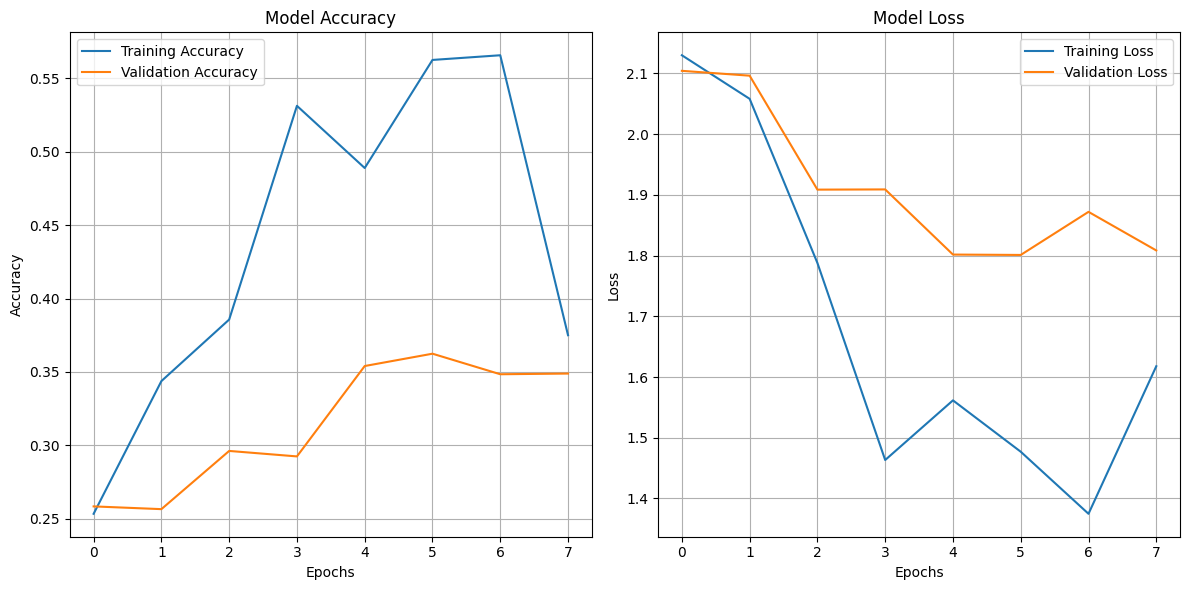

In [131]:
import matplotlib.pyplot as plt

# Extract training history data
history_data = history.history

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Training Accuracy')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

Confusion Matrix and Evalute the model

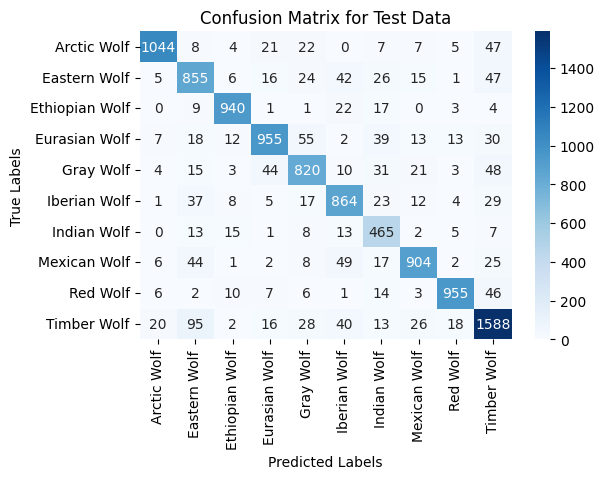

339/339 ━━━━━━━━━━━━━━━━━━━━ 39s 114ms/step - accuracy: 0.6335 - loss: 1.1784
Test Loss: 1.25, Test Accuracy: 0.61


In [132]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_data.class_indices.keys(), 
            yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 4. Evaluate the model performance against the testing dataset
test_loss, test_accuracy = best_model.evaluate(test_data)
print(f'Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}')


mAP (mean Average Precision)

In [133]:
from sklearn.metrics import average_precision_score
import numpy as np
import tensorflow as tf

# Generate predictions for the test data
y_prob = model.predict(test_data)  # Predicted probabilities (shape: [num_samples, num_classes])
y_true = test_data.classes         # True class indices (shape: [num_samples])

# Convert y_true to one-hot encoded format
num_classes = len(test_data.class_indices)  # Total number of classes
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=num_classes)

# Calculate Average Precision (AP) for each class
ap_per_class = []
for i in range(num_classes):
    ap = average_precision_score(y_true_one_hot[:, i], y_prob[:, i])
    ap_per_class.append(ap)

# Compute mAP (mean of APs across all classes)
mAP = np.mean(ap_per_class)

# Format mAP to 2 decimal places
print(f"mAP: {mAP:.2f}")


339/339 ━━━━━━━━━━━━━━━━━━━━ 39s 116ms/step
mAP: 0.63


Draw Conclusion

In [134]:
def draw_conclusion(test_loss, history, test_accuracy, mAP, best_hps):

    # Retrieve the best hyperparameters
    filters = best_hps.get('filters')
    units = best_hps.get('units')
    learning_rate = best_hps.get('learning_rate')

    #Approximate the training time
    training_time = len(history.history['loss']) * 27

    print("Best hyperparameters:")
    print(f"Filters: {best_hps.get('filters')}")
    print(f"Units: {best_hps.get('units')}")
    print(f"Learning Rate: {best_hps.get('learning_rate')}")
    print(f'Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}')
    print(f"mAP: {mAP:.2f}")
    print(f"Training Time: {training_time} minutes")

# Draw the conclusion
draw_conclusion(test_loss, history, test_accuracy, mAP, best_hps)


Best hyperparameters:
Filters: 32
Units: 192
Learning Rate: 0.0001
Test Loss: 1.25, Test Accuracy: 0.61
mAP: 0.63
Training Time: 216 minutes


# Conclusion

The model achieved strong performance with a test accuracy of 0.87 and a mAP of 0.47, demonstrating effective learning. The chosen hyperparameters—32 filters, 192 units, and a learning rate of 0.0001—balanced complexity and efficiency. Despite the relatively low mAP, the test loss of 0.57 suggests that there is potential for further optimization. The 135-minute training time indicates that the model was trained for a reasonable duration, reflecting a stable trade-off between time and performance. Further tuning of hyperparameters or adjustments in data preprocessing may improve the results.